In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statsmodels.api as sm
from importkickdata import loadkickdata

# Function loads and cleans kicking data from profootballreference.com
kicks = loadkickdata('kickingdata.csv')
kicks.columns

Index(['Date', 'Tm', 'At', 'Opp', 'Result', 'Player', 'Dist', 'Good?', 'Blk?',
       'Home', 'PlayerID', 'Player name', 'Stadium', 'Dist_sq', 'Season',
       'Month', 'Constant'],
      dtype='object')

In [2]:
kicks['Player name'] = kicks['Player'].apply(lambda x: str.split(x, '\\')[0])

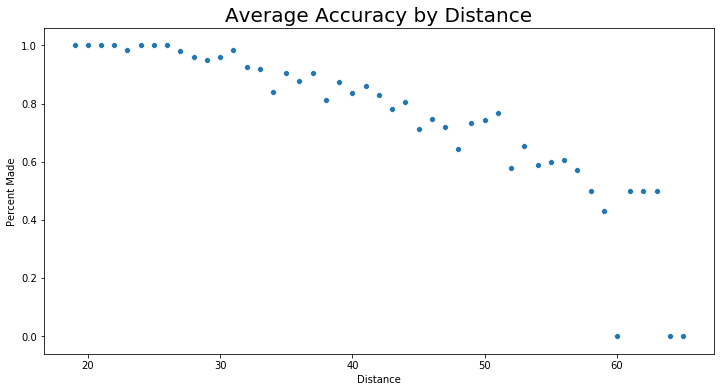

In [3]:
# Create scatter plot displaying success rate by distance of kick
bydistance = kicks.groupby(['Dist']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(bydistance.index, bydistance['Good?'])
plt.title('Average Accuracy by Distance', size=20)
plt.xlabel('Distance')
plt.ylabel('Percent Made')
plt.savefig('Average Accuracy by Distance.png')
plt.show()

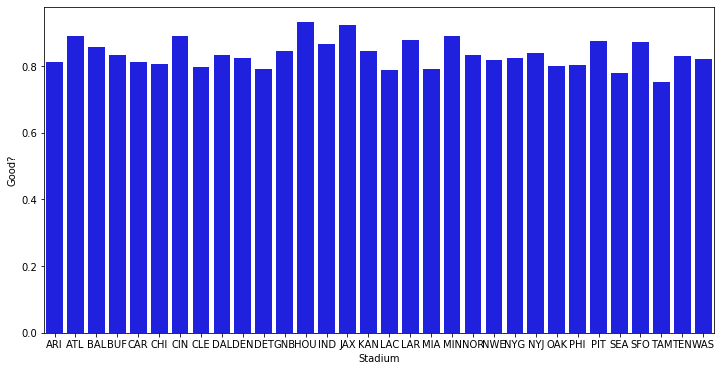

In [4]:
bystadium = kicks.groupby(['Stadium']).mean()

plt.figure(figsize=(12,6))
sns.barplot(bystadium.index, bystadium['Good?'], color='blue')
plt.show()

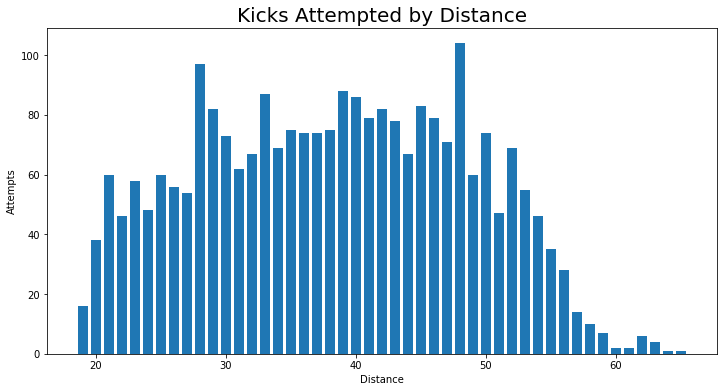

In [5]:
plt.figure(figsize=(12,6))
plt.bar(kicks['Dist'].value_counts().sort_index().index, kicks['Dist'].value_counts().sort_index())
plt.title('Kicks Attempted by Distance', size=20)
plt.xlabel('Distance')
plt.ylabel('Attempts')
plt.savefig('Attempts by Distance.png')
plt.show()

In [6]:
kicks.columns

Index(['Date', 'Tm', 'At', 'Opp', 'Result', 'Player', 'Dist', 'Good?', 'Blk?',
       'Home', 'PlayerID', 'Player name', 'Stadium', 'Dist_sq', 'Season',
       'Month', 'Constant'],
      dtype='object')

Optimization terminated successfully.
         Current function value: 0.380810
         Iterations 6


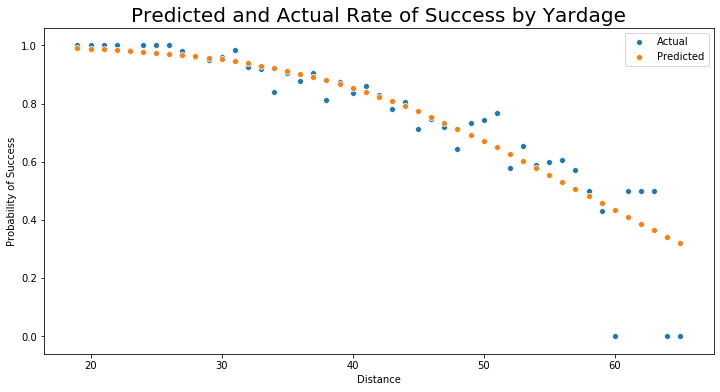

In [42]:
y = kicks['Good?']
X = kicks[['Dist','Constant']]

probit = sm.Probit(y, X)
probit_res = probit.fit()
probit_me = probit_res.get_margeff()
probit_me.summary()

kicks['Kick prob 2'] = probit_res.predict(kicks[['Dist', 'Constant']])

bydistance = kicks.groupby(['Dist']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(bydistance.index, bydistance['Good?'], label='Actual')
sns.scatterplot(bydistance.index, bydistance['Kick prob 2'], label='Predicted')
plt.title('Predicted and Actual Rate of Success by Yardage', size=20)
plt.xlabel('Distance')
plt.ylabel('Probability of Success')
plt.savefig('Predicted Rate of Success.png')
plt.show()

In [8]:
probit_me.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                  Good?
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Dist          -0.0128      0.001    -18.562      0.000      -0.014      -0.011
==============================================================================
"""

In [9]:
y = kicks['Good?']
X = kicks[['Dist', 'Dist_sq', 'Constant']]

probit_sq = sm.Probit(y, X)
probit_sq_res = probit_sq.fit()
probit_sq_me = probit_sq_res.get_margeff()
probit_sq_me.summary()

Optimization terminated successfully.
         Current function value: 0.379512
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
       Probit Marginal Effects       
=====================================
Dep. Variable:                  Good?
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Dist          -0.0297      0.007     -4.340      0.000      -0.043      -0.016
Dist_sq        0.0002   8.07e-05      2.494      0.013    4.31e-05       0.000
==============================================================================
"""

In [10]:
kicks['Kick prob'] = probit_res.predict(kicks[['Dist', 'Constant']])

In [11]:
probit_sq_res.predict(([[0,0,1],[1,1,1],[10,100,1],[20,400,1], [30,900,1]]))

array([0.99999982, 0.99999962, 0.99991932, 0.996006  , 0.95756715])

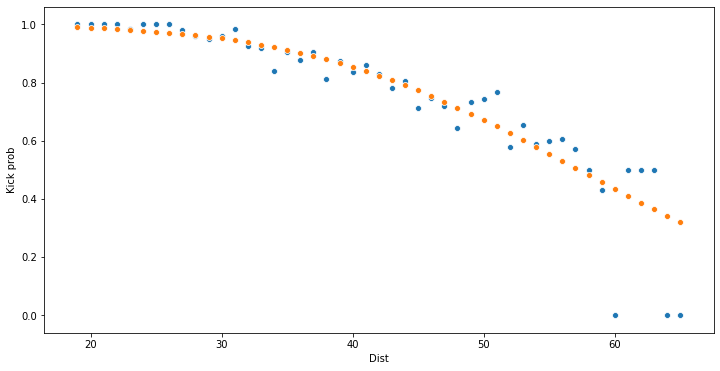

In [12]:
bydistance = kicks.groupby(['Dist']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(bydistance.index, bydistance['Good?'])
sns.scatterplot(bydistance.index, bydistance['Kick prob'])

plt.show()

Optimization terminated successfully.
         Current function value: 0.378691
         Iterations 8


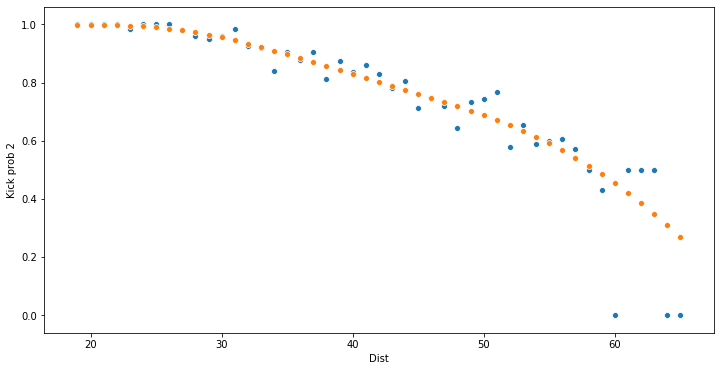

In [13]:
kicks['Dist_cu'] = kicks['Dist'].apply(lambda x: x**3)

y = kicks['Good?']
X = kicks[['Dist', 'Dist_sq', 'Dist_cu', 'Constant']]

probit_cu = sm.Probit(y, X)
probit_cu_res = probit_cu.fit()
probit_cu_me = probit_cu_res.get_margeff()
probit_cu_me.summary()

kicks['Kick prob 2'] = probit_cu_res.predict(kicks[['Dist', 'Dist_sq', 'Dist_cu', 'Constant']])

bydistance = kicks.groupby(['Dist']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(bydistance.index, bydistance['Good?'])
sns.scatterplot(bydistance.index, bydistance['Kick prob 2'])

plt.show()

In [14]:
scatter_data = pd.DataFrame()
scatter_data['cons'] = [1]*100
scatter_data['yards'] = scatter_data.index
scatter_data['yards_sq'] = scatter_data['yards']**2
scatter_data['yards_cu'] = scatter_data['yards']**3
scatter_data['linear_predict'] = probit_res.predict(scatter_data[['yards', 'cons']])
scatter_data['sq_predict'] = probit_sq_res.predict(scatter_data[['yards', 'yards_sq', 'cons']])
scatter_data['cu_predict'] = probit_cu_res.predict(scatter_data[['yards', 'yards_sq', 'yards_cu', 'cons']])

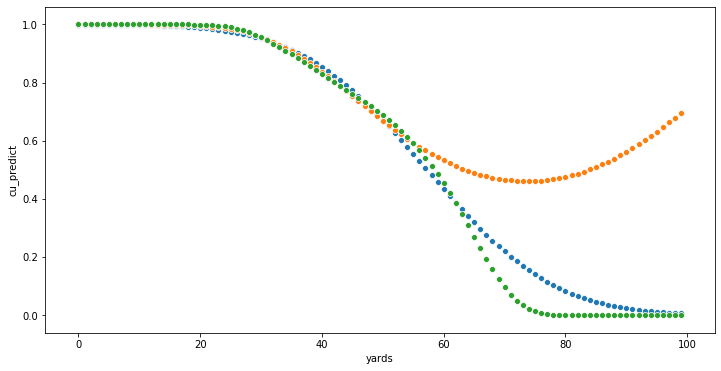

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(scatter_data['yards'], scatter_data['linear_predict'])
sns.scatterplot(scatter_data['yards'], scatter_data['sq_predict'])
sns.scatterplot(scatter_data['yards'], scatter_data['cu_predict'])

plt.show()

In [16]:
kicks.columns

Index(['Date', 'Tm', 'At', 'Opp', 'Result', 'Player', 'Dist', 'Good?', 'Blk?',
       'Home', 'PlayerID', 'Player name', 'Stadium', 'Dist_sq', 'Season',
       'Month', 'Constant', 'Kick prob 2', 'Kick prob', 'Dist_cu'],
      dtype='object')

In [17]:
playerstats = kicks.groupby(['Player name']).mean()
playerstats['Percent differential'] = playerstats['Good?'] - playerstats['Kick prob']
playerstats['Percent differential'].nlargest(10)

Player name
Austin Seibert     0.113049
Justin Tucker      0.098778
Josh Lambo         0.087378
Graham Gano        0.084703
Greg Zuerlein      0.053876
Michael Badgley    0.053649
Matt Prater        0.052258
Matt Bryant        0.052245
Robbie Gould       0.040863
Wil Lutz           0.039163
Name: Percent differential, dtype: float64

In [18]:
playerstats17 = kicks[kicks.Season==2017].groupby(['Player name']).mean()
playerstats17['Percent differential'] = playerstats17['Good?'] - playerstats17['Kick prob']
playerstats17['Percent differential'].nlargest(10)

Player name
Caleb Sturgis         0.204342
Greg Zuerlein         0.121670
Robbie Gould          0.116192
Justin Tucker         0.114304
Josh Lambo            0.088611
Graham Gano           0.088088
Stephen Hauschka      0.082058
Matt Prater           0.068515
Matt Bryant           0.064133
Stephen Gostkowski    0.057938
Name: Percent differential, dtype: float64

In [19]:
playerstats18 = kicks[kicks.Season==2018].groupby(['Player name']).mean()
playerstats18['Percent differential'] = playerstats18['Good?'] - playerstats18['Kick prob']
playerstats18['Percent differential'].nlargest(10)

Player name
Giorgio Tavecchio    0.224587
Mike Nugent          0.163363
Matt Bryant          0.153685
Aldrick Rosas        0.107309
Jason Myers          0.106569
Dustin Hopkins       0.098668
Michael Badgley      0.092495
Robbie Gould         0.090696
Josh Lambo           0.088900
Wil Lutz             0.084175
Name: Percent differential, dtype: float64

In [20]:
# Exclude December
playerstats18_nodec = kicks[((kicks.Season==2018) & (kicks.Month != 12))].groupby(['Player name']).mean()
playerstats18_nodec['Percent differential'] = playerstats18_nodec['Good?'] - playerstats18_nodec['Kick prob']
playerstats18_nodec['Percent differential'].nlargest(10)

Player name
Giorgio Tavecchio    0.224587
Matt Bryant          0.213395
Mike Nugent          0.163363
Stephen Hauschka     0.136620
Jason Myers          0.125190
Michael Badgley      0.117537
Wil Lutz             0.107978
Josh Lambo           0.090026
Robbie Gould         0.089246
Jason Sanders        0.085181
Name: Percent differential, dtype: float64

In [21]:
playerstats19 = kicks[kicks.Season==2019].groupby(['Player name']).mean()
playerstats19['Percent differential'] = playerstats19['Good?'] - playerstats19['Kick prob']
playerstats19['Percent differential'].nsmallest(10)

Player name
Kaare Vedvik       -0.772776
Ryan Succop        -0.709776
Cairo Santos       -0.315530
Mike Nugent        -0.309388
Robbie Gould       -0.198277
Stephen Hauschka   -0.133474
Matt Bryant        -0.133031
Chase McLaughlin   -0.130628
Aldrick Rosas      -0.125277
Adam Vinatieri     -0.095526
Name: Percent differential, dtype: float64

In [22]:
shaus = kicks[kicks['PlayerID'] == 'HausSt00']
shaus.groupby(['Season', 'Month']).mean().loc[:,['Dist', 'Good?', 'Kick prob']]

Dist     Good?  Kick prob
Season Month                                
2017   9      45.833333  0.833333   0.724116
       10     38.250000  0.916667   0.829066
       11     46.333333  0.833333   0.722414
       12     36.888889  0.888889   0.851567
2018   9      41.833333  0.833333   0.801484
       10     41.857143  1.000000   0.788655
       11     37.000000  1.000000   0.836992
       12     40.636364  0.545455   0.814077
2019   9      46.500000  0.666667   0.722645
       10     45.000000  0.750000   0.762645
       11     43.000000  0.333333   0.782904

In [23]:
shaus.groupby(['Season']).count()

,Date,Tm,At,Opp,Result,Player,Dist,Good?,Blk?,Home,PlayerID,Player name,Stadium,Dist_sq,Month,Constant,Kick prob 2,Kick prob,Dist_cu
Season,,,,,,,,,,,,,,,,,,,
2017,33,33,19,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
2018,28,28,14,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
2019,13,13,3,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [24]:
shaus19 = shaus[shaus.Season==2019]

In [25]:
kicksim = pd.DataFrame()
probs = list(shaus19['Kick prob'])
for i in range(13):
    col_name = 'kick ' + str(i+1)
    kicksim[col_name] = pd.Series(np.random.choice([1,0], p=[probs[i],1-probs[i]], size=1000))

In [26]:
kicksim.describe()

,kick 1,kick 2,kick 3,kick 4,kick 5,kick 6,kick 7,kick 8,kick 9,kick 10,kick 11,kick 12,kick 13
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.926000,0.596000,0.812000,0.620000,0.88200,0.779000,0.803000,0.681000,0.754000,0.408000,0.773000,0.934000,0.818000
std,0.261902,0.490943,0.390908,0.485629,0.32277,0.415128,0.397931,0.466322,0.430894,0.491709,0.419102,0.248406,0.386038
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
probs

[0.922039987399988,
 0.6026009191364057,
 0.8240716910943428,
 0.6026009191364057,
 0.8673538188912888,
 0.7727756227115052,
 0.8078504444313838,
 0.692887575816421,
 0.7539671978520093,
 0.38635171311330313,
 0.7727756227115052,
 0.922039987399988,
 0.8078504444313838]

In [28]:
sum(shaus19['Good?'])

8

In [29]:
kicksim['Kicks made'] = 0

for k in range(kicksim.shape[0]):
    kicksim.loc[k, 'Kicks made'] = sum(kicksim.iloc[k,:])



#sum(kicksim.iloc[1,:])

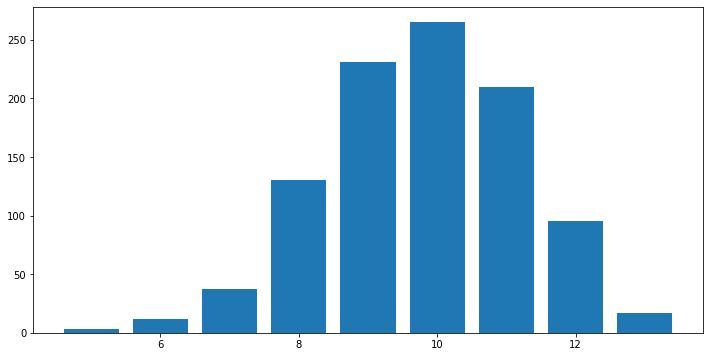

In [30]:
plt.figure(figsize=(12,6))
plt.bar(kicksim['Kicks made'].value_counts().index, kicksim['Kicks made'].value_counts())
plt.show()

In [31]:
sum(kicksim['Kicks made'] <= 8)

182

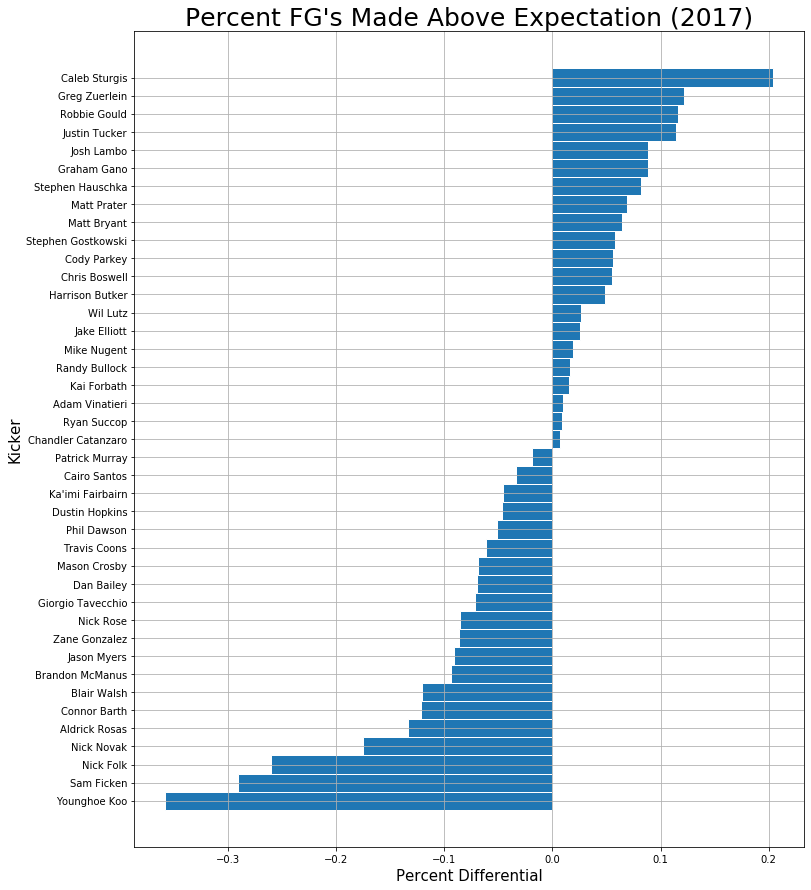

In [45]:
#playerstats17['Percent differential'] *= 100
playerstats17 = playerstats17.sort_values(by=['Percent differential'])
plt.figure(figsize=(12,15))

plt.grid(True)

plt.barh(playerstats17.index,playerstats17['Percent differential'], height=1, edgecolor='white')
plt.title('Percent FG\'s Made Above Expectation (2017)', size=25)
plt.xlabel('Percent Differential', size=15)
plt.ylabel('Kicker', size=15)
plt.savefig('FGAE 2017.png')

plt.show()

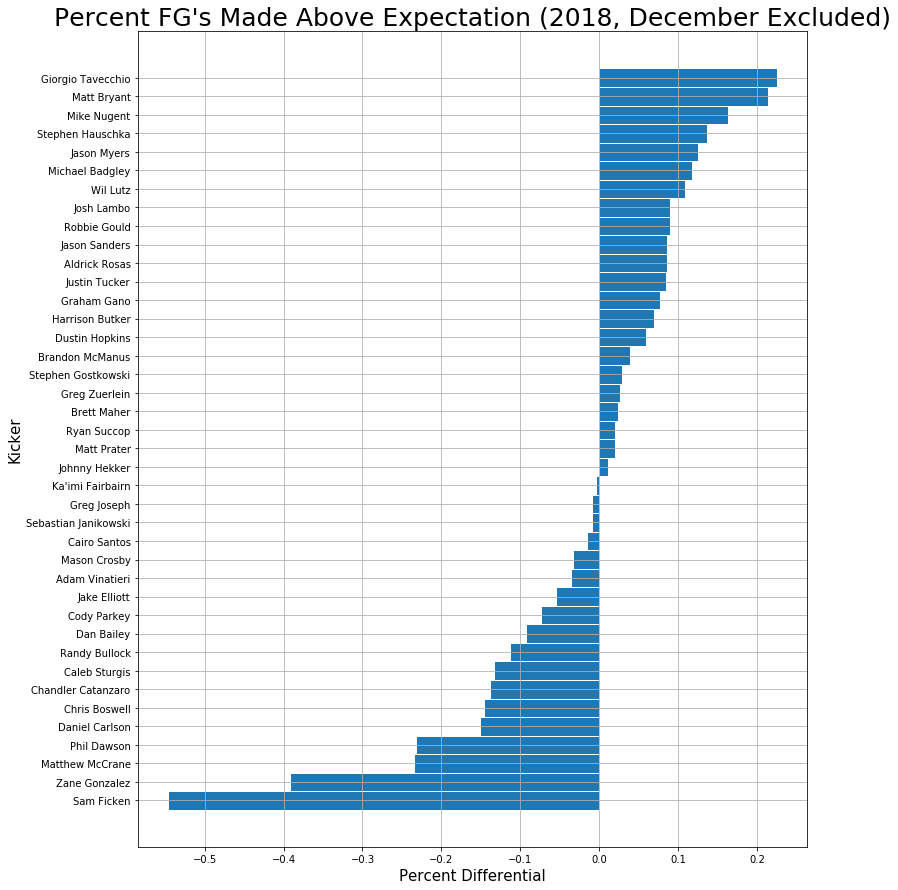

In [46]:
#playerstats18_nodec['Percent differential']
playerstats18_nodec = playerstats18_nodec.sort_values(by=['Percent differential'])

plt.figure(figsize=(12,15))

plt.grid(True)

plt.barh(playerstats18_nodec.index,playerstats18_nodec['Percent differential'], height=1, edgecolor='white')
plt.title('Percent FG\'s Made Above Expectation (2018, December Excluded)', size=25)
plt.xlabel('Percent Differential', size=15)
plt.ylabel('Kicker', size=15)
plt.savefig('FGAE 2018.png')

plt.show()

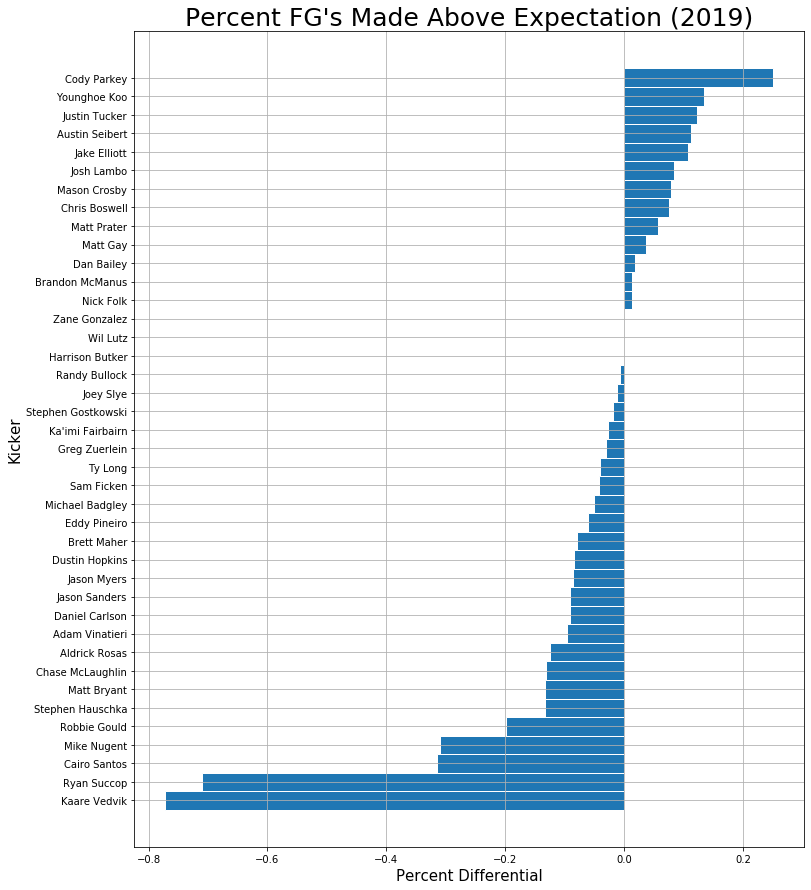

In [47]:
playerstats19 = playerstats19.sort_values(by=['Percent differential'])
plt.figure(figsize=(12,15))

plt.grid(True)

plt.barh(playerstats19.index,playerstats19['Percent differential'], height=1, edgecolor='white')
plt.title('Percent FG\'s Made Above Expectation (2019)', size=25)
plt.xlabel('Percent Differential', size=15)
plt.ylabel('Kicker', size=15)
plt.savefig('FGAE 2019.png')

plt.show()

In [39]:
playerstats17

,Dist,Good?,Blk?,Home,Dist_sq,Season,Month,Constant,Kick prob 2,Kick prob,Dist_cu,Percent differential
Player name,,,,,,,,,,,,
Younghoe Koo,38.166667,0.500000,0.166667,0.833333,1504.500000,2017.0,9.166667,1.0,0.848689,0.858206,60856.166667,-0.358206
Sam Ficken,26.666667,0.666667,0.000000,0.666667,755.333333,2017.0,12.000000,1.0,0.959205,0.956956,22694.666667,-0.290290
Nick Folk,40.000000,0.545455,0.000000,0.909091,1724.000000,2017.0,9.636364,1.0,0.808296,0.805193,78236.363636,-0.259739
Nick Novak,35.615385,0.692308,0.000000,0.384615,1368.692308,2017.0,10.615385,1.0,0.869849,0.867749,56063.153846,-0.175442
Aldrick Rosas,37.000000,0.720000,0.080000,0.440000,1465.880000,2017.0,10.760000,1.0,0.854687,0.852997,61418.920000,-0.132997
Connor Barth,39.562500,0.687500,0.062500,0.625000,1695.437500,2017.0,10.062500,1.0,0.812869,0.808713,76446.562500,-0.121213
Blair Walsh,38.103448,0.724138,0.000000,0.551724,1537.827586,2017.0,10.551724,1.0,0.841231,0.844640,64817.620690,-0.120502
Brandon McManus,37.812500,0.750000,0.062500,0.625000,1527.000000,2017.0,10.625000,1.0,0.843480,0.843881,65562.312500,-0.093881
Jason Myers,38.933333,0.733333,0.000000,0.466667,1627.200000,2017.0,9.466667,1.0,0.825559,0.824027,71801.333333,-0.090693


In [54]:
playerstats17['Percent differential'].nlargest(15)

Player name
Caleb Sturgis         0.204342
Greg Zuerlein         0.121670
Robbie Gould          0.116192
Justin Tucker         0.114304
Josh Lambo            0.088611
Graham Gano           0.088088
Stephen Hauschka      0.082058
Matt Prater           0.068515
Matt Bryant           0.064133
Stephen Gostkowski    0.057938
Cody Parkey           0.056148
Chris Boswell         0.055512
Harrison Butker       0.048547
Wil Lutz              0.026840
Jake Elliott          0.025663
Name: Percent differential, dtype: float64